# Problem Statement:
**Determine   the outcome of the harvest season, i.e. whether the crop would be healthy (alive), damaged by pesticides or damaged by other reasons.**

Data Description

ID:	UniqueID
Estimated_Insects_Count:	Estimated insects count per square meter
Crop_Type:	Category of Crop(0,1)
Soil_Type:	Category of Soil (0,1)
Pesticide_Use_Category:	Type of pesticides uses (1- Never, 2-Previously Used, 3-Currently Using)
Number_Doses_Week:	Number of doses per week
Number_Weeks_Used:	Number of weeks used
Number_Weeks_Quit:	Number of weeks quit
Season:	Season Category (1,2,3)
Crop_Damage:	Crop Damage Category (0=alive, 1=Damage due to other causes, 2=Damage due to Pesticides)

Several factors such as availability of water, soil fertility, protecting crops from rodents, timely use of pesticides & other useful chemicals and nature. While a lot of these factors are difficult to control for, the amount and frequency of pesticides is something the farmer can control.

Pesticides are also special, because while they protect the crop with the right dosage. But, if you add more than required, they may spoil the entire harvest. A high level of pesticide can deem the crop dead / unsuitable for consumption among many outcomes. This data is based on crops harvested by various farmers at the end of harvest season


In [42]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/train.csv
/kaggle/input/test.csv
/kaggle/input/sample_submission.csv


In [43]:
import pandas as pd 
# This librarys is to work with vectors
import numpy as np
# This library is to create some graphics algorithmn
import seaborn as sns
# to render the graphs
import matplotlib.pyplot as plt
# import module to set some ploting parameters
from matplotlib import rcParams
# Library to work with Regular Expressions
import re

# This function makes the plot directly on browser
%matplotlib inline

# Seting a universal figure size 
rcParams['figure.figsize'] = 10,8

# Reading Data. Finding missing values

In [44]:
train=pd.read_csv('/kaggle/input/train.csv')
train.info()
train['Crop_Damage'].value_counts()

#coln =['Estimated_Insects_Count','Number_Doses_Week','Number_Weeks_Used','Number_Weeks_Quit']
#for col in coln:
 #   train[col] = train[col].replace('None', np.nan)

#coln =['Estimated_Insects_Count','Number_Doses_Week','Number_Weeks_Used','Number_Weeks_Quit']
#for col in coln:
   # train[col] = train[col].fillna(train[col].mode()[0], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


0    74238
1    12307
2     2313
Name: Crop_Damage, dtype: int64

*The training data set is not balanced. Has very large dataset for Good Crops and less dataset for damaged crops*

In [45]:
train.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

*Number_Weeks_Used has so 9000 missing data*

In [46]:
train['Number_Weeks_Used'].fillna(train['Number_Weeks_Used'].mode()[0], inplace=True)
train.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [166]:
train['Number_Doses_Week'].value_counts()

20    22589
40    12298
10    12111
30    10438
15     8178
5      5520
25     4890
60     4367
50     3361
35     1832
45      936
0       837
80      672
70      303
55      277
90       83
65       64
75       61
95       30
85       11
Name: Number_Doses_Week, dtype: int64

# Understanding the Train Data and seeing various trend in Data. Gathering insigths

Chances to crop damange based on crop type: 
Crop_Type
0    0.195285
1    0.178677
Name: Crop_Damage, dtype: float64


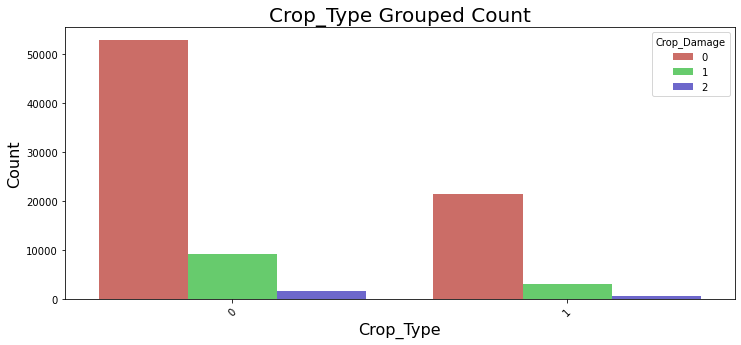

In [167]:
#printing the chance to cropdamage by each Croptype
print("Chances to crop damange based on crop type: ") 
print(train.groupby("Crop_Type")["Crop_Damage"].mean())

# figure size
plt.figure(figsize=(12,5))

#Plotting the count of title by Crop damage or not category
sns.countplot(x='Crop_Type', data=train, palette="hls",
              hue="Crop_Damage")
plt.xlabel("Crop_Type", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Crop_Type Grouped Count", fontsize=20)
plt.xticks(rotation=45)
plt.show()

*Crop type 0 has higher chance of survival compared to crop type 1*
crop Damage Category (0=alive, 1=Damage due to other causes, 2=Damage due to Pesticides)

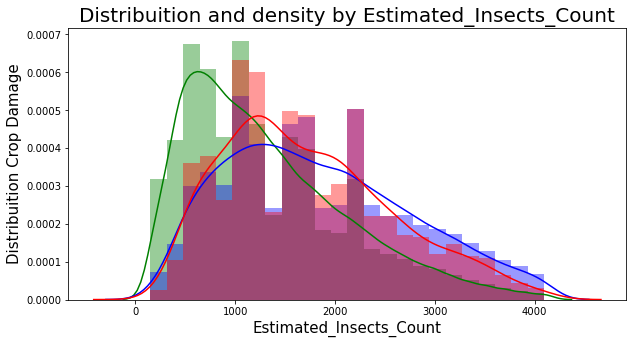

In [168]:
inscect_high_Damage_low = train[(train["Estimated_Insects_Count"] > 0) & 
                              (train["Crop_Damage"] == 0)]

inscect_high_Damage_medium = train[(train["Estimated_Insects_Count"] > 0) & 
                              (train["Crop_Damage"] == 1)]                                   
inscect_high_Damage_high= train[(train["Estimated_Insects_Count"] > 0) & 
                              (train["Crop_Damage"] == 2)]

#figure size
plt.figure(figsize=(10,5))

# Ploting the 2 variables that we create and compare the three
sns.distplot(inscect_high_Damage_low["Estimated_Insects_Count"], bins=24, color='g')
sns.distplot(inscect_high_Damage_medium["Estimated_Insects_Count"], bins=24, color='b')
sns.distplot(inscect_high_Damage_high["Estimated_Insects_Count"], bins=24, color='r')
                                   
                                   
plt.title("Distribuition and density by Estimated_Insects_Count",fontsize=20)
plt.xlabel("Estimated_Insects_Count",fontsize=15)
plt.ylabel("Distribuition Crop Damage",fontsize=15)
plt.show()

*Clear more insects more damage. Interestng there is no much difference between Crop Damage category 2 and 3*

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x360 with 0 Axes>

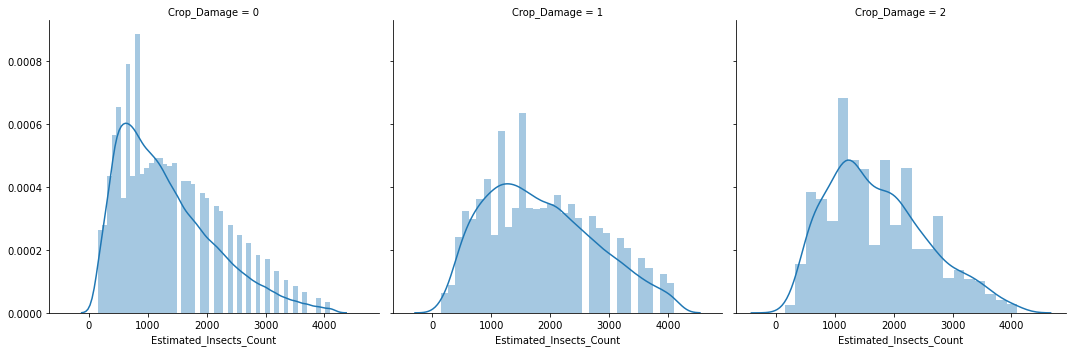

In [169]:
# figure size
plt.figure(figsize=(12,5))

# using facetgrid that is a great way to get information of our dataset
g = sns.FacetGrid(train, col='Crop_Damage',size=5)
g = g.map(sns.distplot, "Estimated_Insects_Count")
plt.show()

In [170]:
train['Estimated_Insects_Count'].value_counts()

1212    3438
1132    3370
1478    3358
1385    3309
1056    3235
        ... 
3896     134
3515     123
4097     113
231       89
169       63
Name: Estimated_Insects_Count, Length: 71, dtype: int64

Crop_Damage      0     1     2
Soil_Type                     
0            39841  6953  1330
1            34397  5354   983


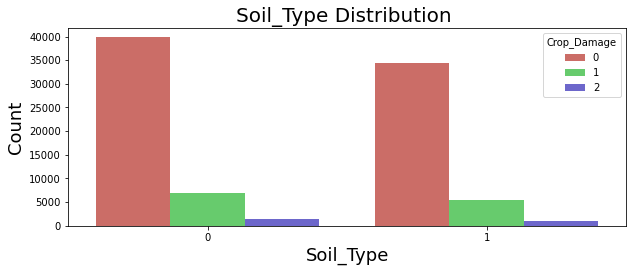

Crop_Damage                 0     1     2
Pesticide_Use_Category                   
1                         118   554   165
2                       56958  6072   679
3                       17162  5681  1469


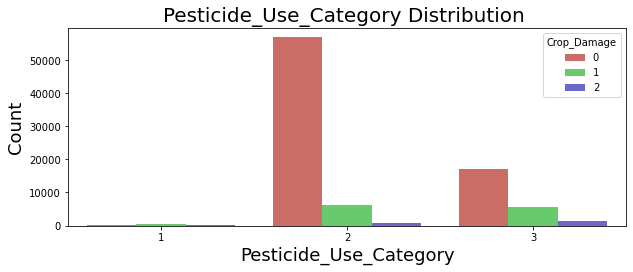

Crop_Damage            0     1    2
Number_Doses_Week                  
0                    118   554  165
5                   5007   473   40
10                 10422  1542  147
15                  7108   950  120
20                 17789  4042  758
25                  4310   468  112
30                  8708  1399  331
35                  1647   155   30
40                 10092  1797  409
45                   868    55   13
50                  2995   300   66
55                   250    25    2
60                  3836   435   96
65                    57     7    0
70                   275    21    7
75                    56     5    0
80                   590    68   14
85                     9     1    1
90                    73     8    2
95                    28     2    0


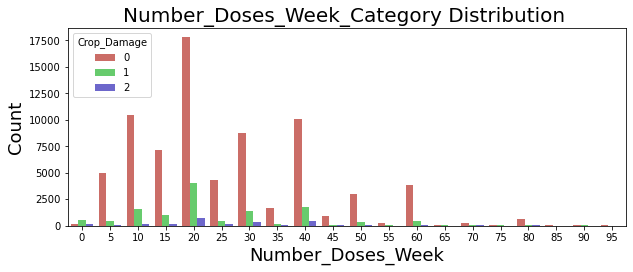

Crop_Damage          0    1    2
Number_Weeks_Used               
0.0                107  495  138
5.0                539   33    0
6.0                356   15    0
7.0                401   16    1
8.0                528   30    1
...                ...  ...  ...
63.0                31   17    2
64.0                26   15    3
65.0                12   15    4
66.0                11    4    2
67.0                 5    3    0

[64 rows x 3 columns]


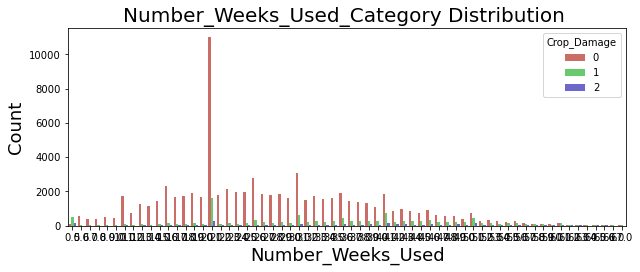

Crop_Damage      0     1     2
Season                        
1            22493  3748   661
2            36881  6115  1214
3            14864  2444   438


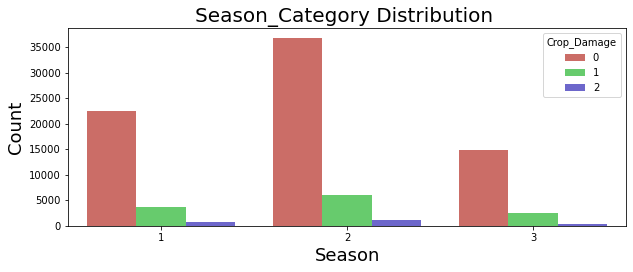

Crop_Damage            0     1     2
Number_Weeks_Quit                   
0                  19359  6273  1642
1                   2490   113    17
2                   2535   175    33
3                   2330   210    38
4                   2286   206    36
5                   2496   280    55
6                   2298   246    40
7                   2147   234    37
8                   2048   215    31
9                   1686   191    20
10                  2546   301    46
11                  1871   191    28
12                  2421   244    36
13                  2237   219    29
14                  2318   268    24
15                  2362   272    34
16                  1887   203    18
17                  1811   193    14
18                  1846   172    12
19                  1615   204    22
20                  1949   233    27
21                  1275   148    13
22                  1261   142    11
23                  1029   132     5
24                   940   108     6
2

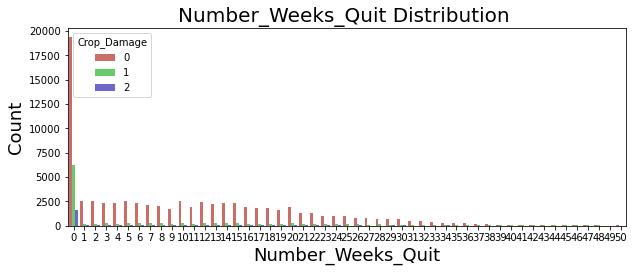

In [171]:
print(pd.crosstab(train.Soil_Type, train.Crop_Damage))
#Plotting the result
plt.subplot(2,1,1)
sns.countplot("Soil_Type",data=train,hue="Crop_Damage", palette="hls")
plt.ylabel("Count", fontsize=18)
plt.xlabel("Soil_Type", fontsize=18)
plt.title("Soil_Type Distribution ", fontsize=20)

#plt.subplot(2,1,2)
#sns.swarmplot(x='Soil_Type',y="Estimated_Insects_Count",data=train,
             # hue="Crop_Damage", palette="hls", )
#plt.ylabel("Estimated_Insects_Count", fontsize=18)
#plt.xlabel("Soil_Type", fontsize=18)
#plt.title("Estimated_Insects Distribution by Soil Categorys ", fontsize=20)

#plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()

print(pd.crosstab(train.Pesticide_Use_Category, train.Crop_Damage))
#Plotting the result
plt.subplot(2,1,1)
sns.countplot("Pesticide_Use_Category",data=train,hue="Crop_Damage", palette="hls")
plt.ylabel("Count", fontsize=18)
plt.xlabel("Pesticide_Use_Category", fontsize=18)
plt.title("Pesticide_Use_Category Distribution ", fontsize=20)
plt.show()

print(pd.crosstab(train.Number_Doses_Week, train.Crop_Damage))
#Plotting the result
plt.subplot(2,1,1)
sns.countplot("Number_Doses_Week",data=train,hue="Crop_Damage", palette="hls")
plt.ylabel("Count", fontsize=18)
plt.xlabel("Number_Doses_Week", fontsize=18)
plt.title("Number_Doses_Week_Category Distribution ", fontsize=20)
plt.show()

#Number_Weeks_Used

print(pd.crosstab(train.Number_Weeks_Used, train.Crop_Damage))
#Plotting the result
plt.subplot(2,1,1)
sns.countplot("Number_Weeks_Used",data=train,hue="Crop_Damage", palette="hls")
plt.ylabel("Count", fontsize=18)
plt.xlabel("Number_Weeks_Used", fontsize=18)
plt.title("Number_Weeks_Used_Category Distribution ", fontsize=20)
plt.show()

print(pd.crosstab(train.Season, train.Crop_Damage))
#Plotting the result
plt.subplot(2,1,1)
sns.countplot("Season",data=train,hue="Crop_Damage", palette="hls")
plt.ylabel("Count", fontsize=18)
plt.xlabel("Season", fontsize=18)
plt.title("Season_Category Distribution ", fontsize=20)
plt.show()


print(pd.crosstab(train.Number_Weeks_Quit, train.Crop_Damage))
#Plotting the result
plt.subplot(2,1,1)
sns.countplot("Number_Weeks_Quit",data=train,hue="Crop_Damage", palette="hls")
plt.ylabel("Count", fontsize=18)
plt.xlabel("Number_Weeks_Quit", fontsize=18)
plt.title("Number_Weeks_Quit Distribution ", fontsize=20)
plt.show()


# Soil type 0 has higher survial rate for Crop compared to soil type 1; 
# Pesticide category 0 has no impact on Crop survival. Means if there is less data to determine that no pesticide has any impact on crop survival.  
# Pesticide category 2 (Previously used Pesticides) is the best for Crops compared to the newly ones; 
# If the pesticide doses are between 10 to 40 the crops have high survival rate; 
# Crop has better chance to survive in Season 2 compared to other seasons*

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


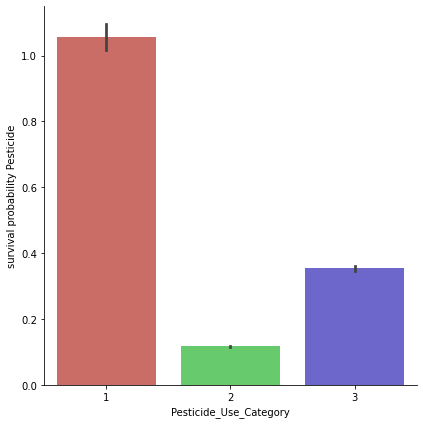

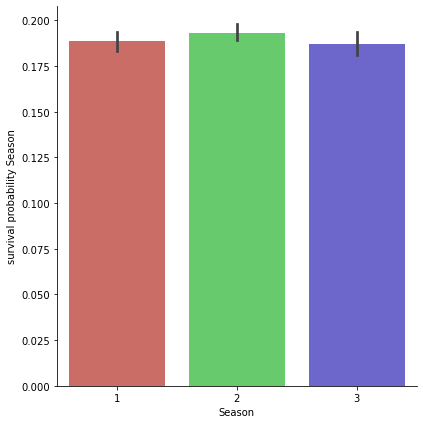

In [172]:
# Explore Parch feature vs Survived
g  = sns.factorplot(x="Pesticide_Use_Category",y="Crop_Damage",data=train, kind="bar", size = 6,palette = "hls")
g = g.set_ylabels("survival probability Pesticide")

g  = sns.factorplot(x="Season",y="Crop_Damage",data=train, kind="bar", size = 6,palette = "hls")
g = g.set_ylabels("survival probability Season")

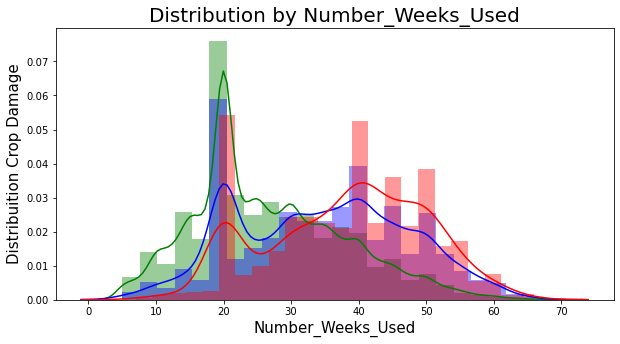

In [173]:
#lets understand the impact of number of weeks of pestiside use on the Crop

inscect_high_Damage_low = train[(train["Number_Weeks_Used"] > 0) & 
                              (train["Crop_Damage"] == 0)]

inscect_high_Damage_medium = train[(train["Number_Weeks_Used"] > 0) & 
                              (train["Crop_Damage"] == 1)]                                   
inscect_high_Damage_high= train[(train["Number_Weeks_Used"] > 0) & 
                              (train["Crop_Damage"] == 2)]

#figure size
plt.figure(figsize=(10,5))

# Ploting the 2 variables that we create and compare the three
sns.distplot(inscect_high_Damage_low["Number_Weeks_Used"], bins=24, color='g')
sns.distplot(inscect_high_Damage_medium["Number_Weeks_Used"], bins=24, color='b')
sns.distplot(inscect_high_Damage_high["Number_Weeks_Used"], bins=24, color='r')
                                   
                                   
plt.title("Distribution by Number_Weeks_Used",fontsize=20)
plt.xlabel("Number_Weeks_Used",fontsize=15)
plt.ylabel("Distribuition Crop Damage",fontsize=15)
plt.show()



*Its clear that If the usage of pestiside is used between 10 to 30 there is higher chance for Crop to survice. If the number of weeks of pestiside usage is more than 30 then crop damage definetly more than moderate or high *

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


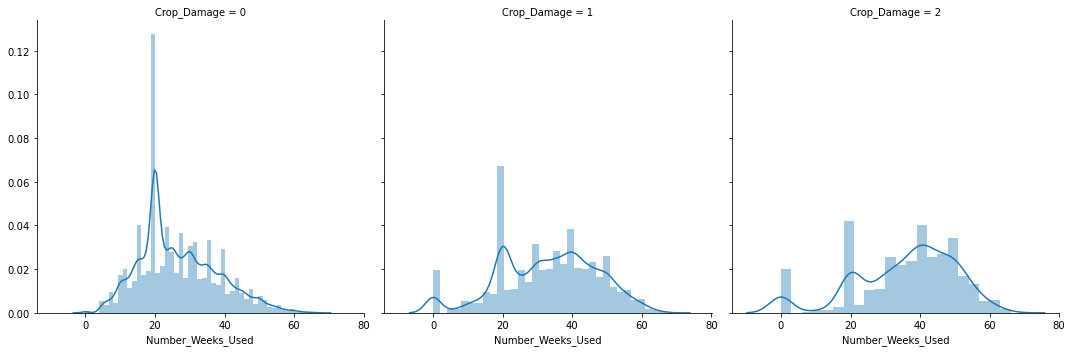

In [174]:
# using facetgrid that is a great way to get information of our dataset
g = sns.FacetGrid(train, col='Crop_Damage',size=5)
g = g.map(sns.distplot, "Number_Weeks_Used")
plt.show()

*Looks like number of weeks of pesticide usage and the crop type has to be looked together. We can address this in correlation chart*

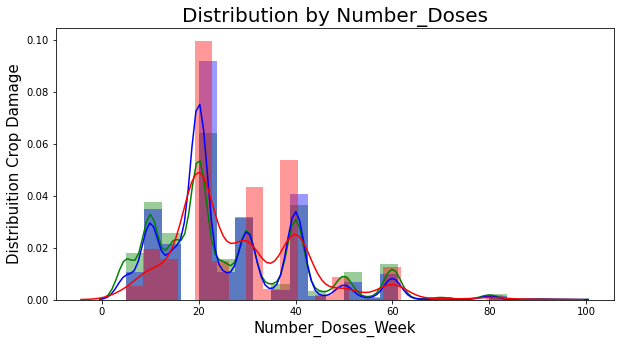

In [175]:
#lets understand the impact of number of doses of pestiside use on the Crop

inscect_high_Damage_low = train[(train["Number_Doses_Week"] > 0) & 
                              (train["Crop_Damage"] == 0)]

inscect_high_Damage_medium = train[(train["Number_Doses_Week"] > 0) & 
                              (train["Crop_Damage"] == 1)]                                   
inscect_high_Damage_high= train[(train["Number_Doses_Week"] > 0) & 
                              (train["Crop_Damage"] == 2)]

#figure size
plt.figure(figsize=(10,5))

# Ploting the 2 variables that we create and compare the three
sns.distplot(inscect_high_Damage_low["Number_Doses_Week"], bins=24, color='g')
sns.distplot(inscect_high_Damage_medium["Number_Doses_Week"], bins=24, color='b')
sns.distplot(inscect_high_Damage_high["Number_Doses_Week"], bins=24, color='r')
                                   
                                   
plt.title("Distribution by Number_Doses",fontsize=20)
plt.xlabel("Number_Doses_Week",fontsize=15)
plt.ylabel("Distribuition Crop Damage",fontsize=15)
plt.show()


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


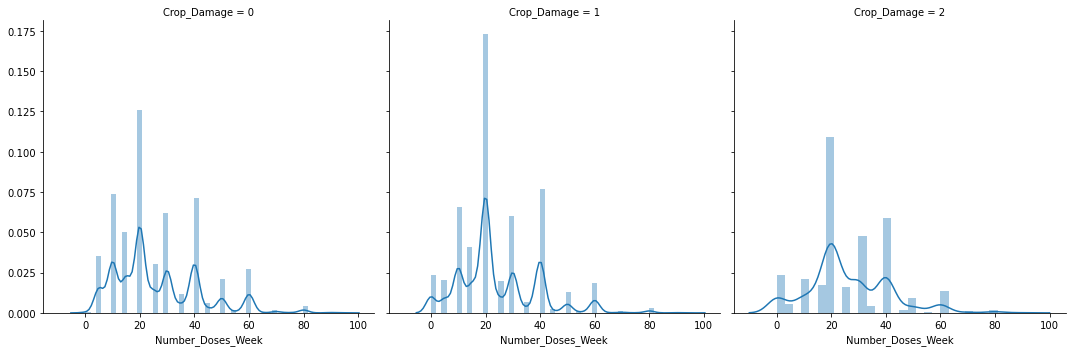

In [176]:
# using facetgrid that is a great way to get information of our dataset
g = sns.FacetGrid(train, col='Crop_Damage',size=5)
g = g.map(sns.distplot, "Number_Doses_Week")
plt.show()

**Looks like number of dosage of pesticide  and the crop type has to be looked together. We can address this in correlation chart**

In [177]:
df_train1=train.drop('ID', axis=1)


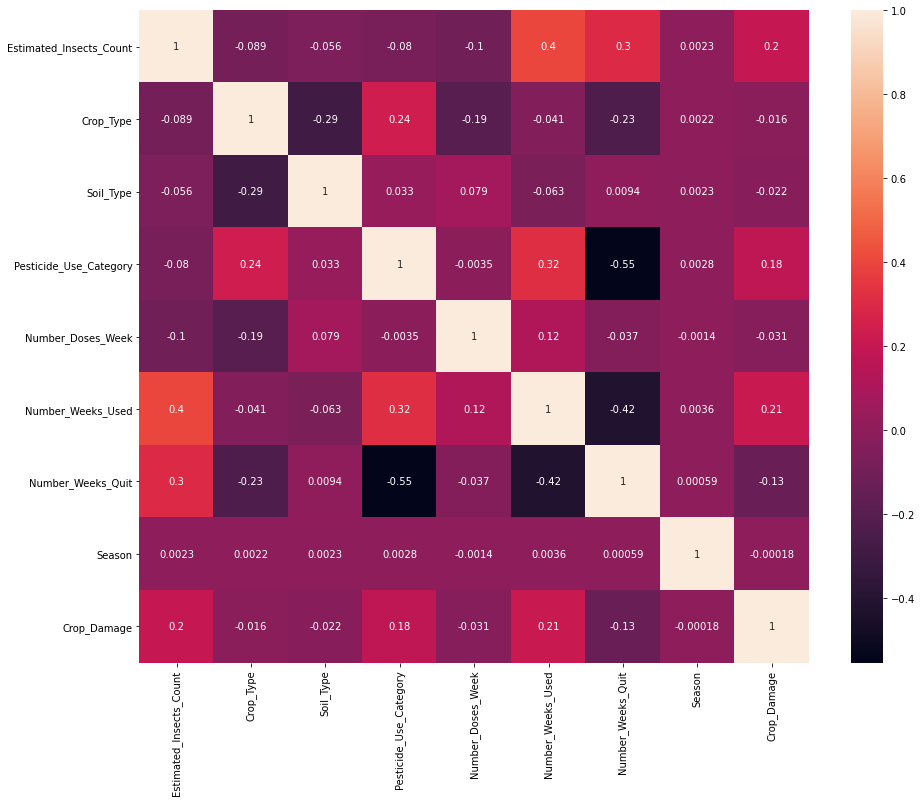

In [178]:
plt.show()
plt.figure(figsize=(15,12))
sns.heatmap(df_train1.astype(float).corr(),vmax=1.0,  annot=True)
plt.show()

# Crop damanage + correlation with Insects, Pesticide and Number of weeks pesticide is used. But some thing missing. Lets analyze at each factor level

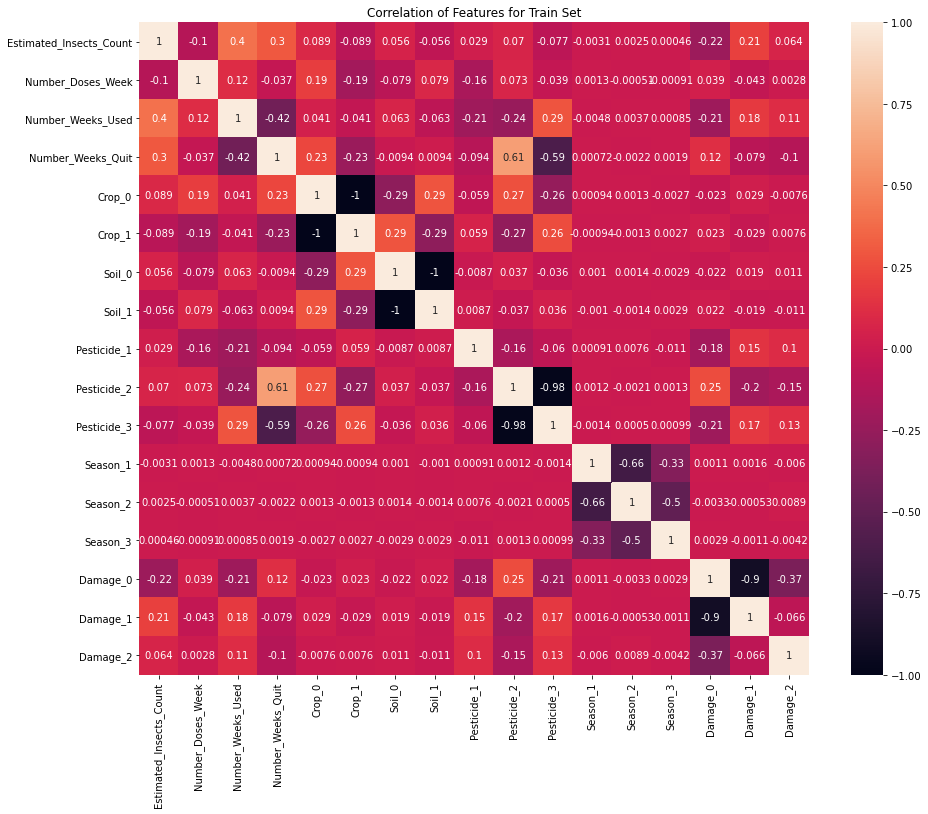

In [179]:
df_train = pd.get_dummies(df_train1, columns=["Crop_Type","Soil_Type","Pesticide_Use_Category","Season","Crop_Damage"],\
                         prefix=["Crop","Soil","Pesticide","Season","Damage"], drop_first=False)
plt.figure(figsize=(15,12))
plt.title('Correlation of Features for Train Set')
sns.heatmap(df_train.astype(float).corr(),vmax=1.0,  annot=True)
plt.show()

# Survival (Damage=0) has positive correlation with Pesticide doses per week, Number of weeks pesticide is quit also if the old pesticide is used instead of new ones
# Soil 1 is better for Crops, Soil 2 is not good

# Non Survival (Damange=1, or 2) has positive correlation with # of insects, Crop type 0, Soil 0,not using any pesticide or using new pesticide 

# So it recommended that farmer use Soil 1 and continue using old pesticide instead of new ones.

In [180]:
df_train

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Crop_0,Crop_1,Soil_0,Soil_1,Pesticide_1,Pesticide_2,Pesticide_3,Season_1,Season_2,Season_3,Damage_0,Damage_1,Damage_2
0,188,0,0.0,0,0,1,1,0,1,0,0,1,0,0,1,0,0
1,209,0,0.0,0,0,1,1,0,1,0,0,0,1,0,0,1,0
2,257,0,0.0,0,0,1,1,0,1,0,0,0,1,0,0,1,0
3,257,0,0.0,0,0,1,0,1,1,0,0,0,1,0,0,1,0
4,342,0,0.0,0,0,1,1,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88853,3337,10,12.0,44,0,1,1,0,0,1,0,0,0,1,1,0,0
88854,3516,10,20.0,38,0,1,1,0,0,1,0,1,0,0,1,0,0
88855,3516,15,40.0,8,0,1,1,0,0,1,0,0,1,0,1,0,0
88856,3702,10,25.0,18,0,1,1,0,0,1,0,0,0,1,1,0,0


In [181]:
df_train['Estimated_Insects_Count'] = df_train['Estimated_Insects_Count'].astype("int16")
df_train['Number_Doses_Week'] = df_train['Number_Doses_Week'].astype("int16")
df_train['Number_Weeks_Used'] = df_train['Number_Weeks_Used'].astype("int16")
df_train['Number_Weeks_Quit'] = df_train['Number_Weeks_Quit'].astype("int16")


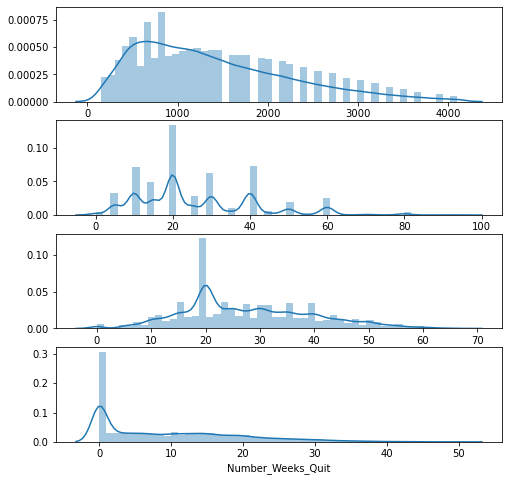

In [182]:
#df_train['Estimated_Insects_Count']=np.log(df_train['Estimated_Insects_Count'])
num_cols = ['Estimated_Insects_Count','Number_Doses_Week','Number_Weeks_Used','Number_Weeks_Quit']
    
fig,ax = plt.subplots(4,1,figsize=(8,8),squeeze=False)
r=0
c=0
for i in num_cols:
    sns.distplot(df_train[i],ax=ax[r][c])
    r+=1

In [183]:
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Estimated_Insects_Count  88858 non-null  int16
 1   Number_Doses_Week        88858 non-null  int16
 2   Number_Weeks_Used        88858 non-null  int16
 3   Number_Weeks_Quit        88858 non-null  int16
 4   Crop_0                   88858 non-null  uint8
 5   Crop_1                   88858 non-null  uint8
 6   Soil_0                   88858 non-null  uint8
 7   Soil_1                   88858 non-null  uint8
 8   Pesticide_1              88858 non-null  uint8
 9   Pesticide_2              88858 non-null  uint8
 10  Pesticide_3              88858 non-null  uint8
 11  Season_1                 88858 non-null  uint8
 12  Season_2                 88858 non-null  uint8
 13  Season_3                 88858 non-null  uint8
 14  Damage_0                 88858 non-null  uint8
 15  Da

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Crop_0,Crop_1,Soil_0,Soil_1,Pesticide_1,Pesticide_2,Pesticide_3,Season_1,Season_2,Season_3,Damage_0,Damage_1,Damage_2
0,188,0,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0
1,209,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0
2,257,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0
3,257,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0
4,342,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0


In [184]:
df_train['Estimated_Insects_Count']=np.log(df_train['Estimated_Insects_Count'])
#df_train['Number_Doses_Week1']=np.log(df_train['Number_Doses_Week'])
#df_train['Number_Weeks_Used1']=np.log(df_train['Number_Weeks_Used'])
#df_train['Number_Weeks_Quit1']=np.log(df_train['Number_Weeks_Quit'])


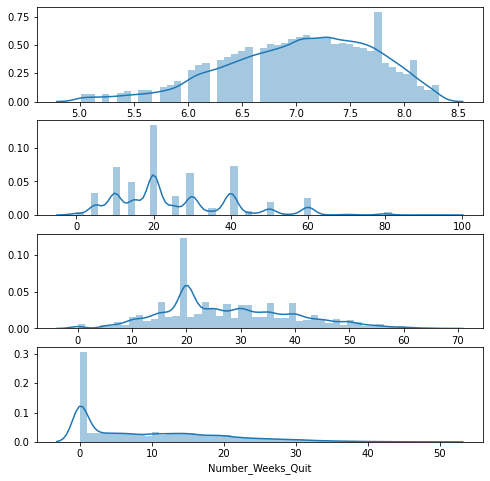

In [185]:
num_cols = ['Estimated_Insects_Count','Number_Doses_Week','Number_Weeks_Used','Number_Weeks_Quit']
    
fig,ax = plt.subplots(4,1,figsize=(8,8),squeeze=False)
r=0
c=0
for i in num_cols:
    sns.distplot(df_train[i],ax=ax[r][c])
    r+=1

In [186]:
df_train

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Crop_0,Crop_1,Soil_0,Soil_1,Pesticide_1,Pesticide_2,Pesticide_3,Season_1,Season_2,Season_3,Damage_0,Damage_1,Damage_2
0,5.236442,0,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0
1,5.342334,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0
2,5.549076,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0
3,5.549076,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0
4,5.834811,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88853,8.112827,10,12,44,0,1,1,0,0,1,0,0,0,1,1,0,0
88854,8.165079,10,20,38,0,1,1,0,0,1,0,1,0,0,1,0,0
88855,8.165079,15,40,8,0,1,1,0,0,1,0,0,1,0,1,0,0
88856,8.216628,10,25,18,0,1,1,0,0,1,0,0,0,1,1,0,0



# feature Engineering:
Lets normalize the numeric variables
Lets implement Dummy Encoding of the Categorical Values and chang e then to int16

In [47]:
train['Estimated_Insects_Count']=np.log(train['Estimated_Insects_Count'])

In [193]:
train.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000
mean,7.039049,0.284375,0.458417,2.264186,25.849952,27.750490,9.589986,1.896959,0.190562
std,0.678583,0.451119,0.498271,0.461772,15.554428,12.032261,9.900631,0.701322,0.454215
min,5.010635,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,6.594413,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,7.100027,0.000000,0.000000,2.000000,20.000000,26.000000,7.000000,2.000000,0.000000
75%,7.548556,1.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,8.318010,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


In [48]:
#Implementing  Encoding for some of the numeric columns
train['Number_Doses_Week_bin'] = np.where(train['Number_Doses_Week']>20,1,0)
train['Number_Weeks_Used_bin'] = np.where(train['Number_Weeks_Used']>36,1,0)
train['Number_Weeks_Quit_bin'] = np.where(train['Number_Weeks_Quit']>7,1,0)

In [49]:

#Implementing  Dummy Encoding for cate gorical columns
train = pd.get_dummies(train, columns=["Crop_Type","Soil_Type","Pesticide_Use_Category","Season"],\
                         prefix=["Crop","Soil","Pesticide","Season"], drop_first=False)

In [9]:

#train=train.drop(['Number_Doses_Week','Number_Weeks_Used','Number_Weeks_Quit'], axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  float64
 2   Number_Doses_Week        88858 non-null  int64  
 3   Number_Weeks_Used        88858 non-null  float64
 4   Number_Weeks_Quit        88858 non-null  int64  
 5   Crop_Damage              88858 non-null  int64  
 6   Number_Doses_Week_bin    88858 non-null  int64  
 7   Number_Weeks_Used_bin    88858 non-null  int64  
 8   Number_Weeks_Quit_bin    88858 non-null  int64  
 9   Crop_0                   88858 non-null  uint8  
 10  Crop_1                   88858 non-null  uint8  
 11  Soil_0                   88858 non-null  uint8  
 12  Soil_1                   88858 non-null  uint8  
 13  Pesticide_1              88858 non-null  uint8  
 14  Pesticide_2           

In [50]:
col=['Crop_0','Crop_1','Soil_0','Soil_1','Pesticide_1','Pesticide_2','Pesticide_3','Season_1','Season_2','Season_3']
for i in col:
    train[i] = train[i].astype('category')
    train[i] = train[i].cat.codes.astype("int16")

In [51]:
train=train.drop(['Number_Doses_Week','Number_Weeks_Used','Number_Weeks_Quit'],axis=1)
train=train.drop(['ID'],axis=1)

In [212]:

X= train.drop(['Crop_Damage'],axis=1)
y= train['Crop_Damage']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

# Model:Applying Machine Learning model
We have classification problem. Natrually lets apply the classifiers. Lets find which classifer is better fit for the train data

In [188]:
#Importing the auxiliar and preprocessing librarys 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import accuracy_score
#Models
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier, RandomTreesEmbedding

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will ra

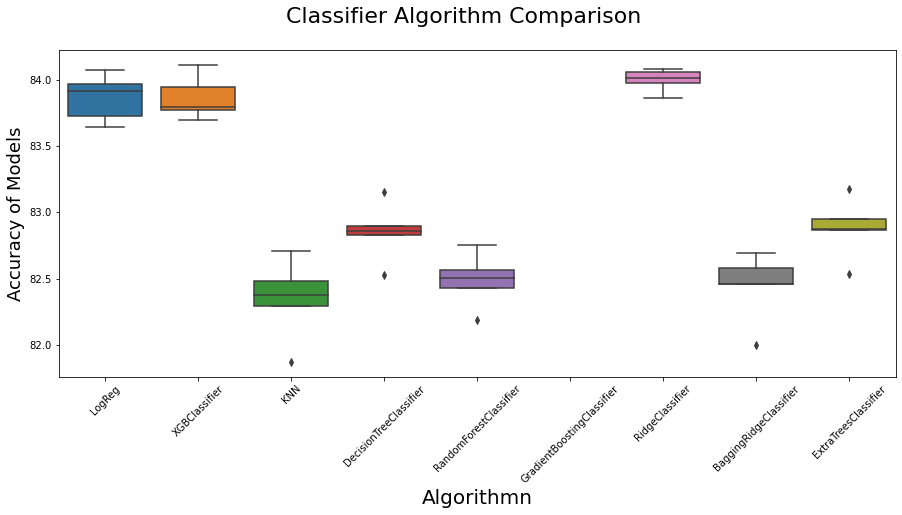

In [214]:
clfs = []
seed = 3

clfs.append(("LogReg", 
             Pipeline([("Scaler", StandardScaler()),
                       ("LogReg", LogisticRegression())])))

clfs.append(("XGBClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("XGB", XGBClassifier())]))) 
clfs.append(("KNN", 
             Pipeline([("Scaler", StandardScaler()),
                       ("KNN", KNeighborsClassifier())]))) 

clfs.append(("DecisionTreeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("DecisionTrees", DecisionTreeClassifier())]))) 

clfs.append(("RandomForestClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RandomForest", RandomForestClassifier())]))) 

clfs.append(("GradientBoostingClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("GradientBoosting", GradientBoostingClassifier(max_features=15, n_estimators=150))]))) 

clfs.append(("RidgeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RidgeClassifier", RidgeClassifier())])))

clfs.append(("BaggingRidgeClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("BaggingClassifier", BaggingClassifier())])))

clfs.append(("ExtraTreesClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("ExtraTrees", ExtraTreesClassifier())])))

#'neg_mean_absolute_error', 'neg_mean_squared_error','r2'
scoring = 'accuracy'
n_folds = 10

results, names  = [], [] 

for name, model  in clfs:
    kfold = KFold(n_splits=n_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv= 5, scoring=scoring, n_jobs=-1)*100    
    names.append(name)
    results.append(cv_results)    
    #msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    #print(msg)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,6))
fig.suptitle('Classifier Algorithm Comparison', fontsize=22)
ax = fig.add_subplot(111)
sns.boxplot(x=names, y=results)
ax.set_xticklabels(names)
ax.set_xlabel("Algorithmn", fontsize=20)
ax.set_ylabel("Accuracy of Models", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

# Looks like gradient boost classifier are best fit for Training data set. Lets try LGBM

# LightGBM is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient with the following advantages:

# Faster training speed and higher efficiency.Lower memory usage.Better accuracy.Support of parallel and GPU learning.Capable of handling large-scale data.



In [216]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.metrics import *
import gc
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, mean_absolute_error,accuracy_score, classification_report
kfold = KFold(n_splits=10, random_state=7)
from lightgbm import LGBMClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_log_error
lgbc = LGBMClassifier(n_estimators=550,
                     learning_rate=0.03,
                     min_child_samples=40,
                     random_state=1,
                     colsample_bytree=0.5,
                     reg_alpha=2,
                     reg_lambda=2)

resultsLGB = cross_val_score(lgbc,X_train, y_train,cv=kfold)
print("LightGBM",resultsLGB.mean()*100)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LightGBM 84.04334697119657


# Better result in LGBM 84.04 accuracy with X Train

In [219]:
LGB=lgbc.fit(X_train,y_train)

In [231]:
y_predict_LGBM = LGB.predict(X_test)
print(100*(np.sqrt(mean_squared_log_error(np.exp(y_test), np.exp(y_predict_LGBM)))))
resultsLGB_test = cross_val_score(lgbc,X_test, y_test,cv=kfold)
print("LightGBM",resultsLGB_test.mean()*100)


31.457515235652078
LightGBM 84.08281192819868


In [221]:

sorted(zip(LGB.feature_importances_, X_train), reverse = True)

[(19620, 'Estimated_Insects_Count'),
 (1496, 'Number_Doses_Week_bin'),
 (1274, 'Crop_0'),
 (1173, 'Number_Weeks_Used_bin'),
 (1097, 'Pesticide_2'),
 (1069, 'Number_Weeks_Quit_bin'),
 (1028, 'Soil_0'),
 (890, 'Pesticide_1'),
 (738, 'Pesticide_3'),
 (694, 'Crop_1'),
 (568, 'Season_2'),
 (529, 'Soil_1'),
 (514, 'Season_1'),
 (183, 'Season_3')]

# As per LGBM model Incents count is the most significant factor affecting quality of crop followed by doses of pesticide and crop type 0

# CatBoost is a high-performance open source library for gradient boosting on decision trees

In [222]:
from catboost import CatBoostRegressor 
from catboost import  CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import roc_auc_score

#cb = CatBoostRegressor(
    #n_estimators = 1000,
    #learning_rate = 0.11,
    #iterations=1000,
    #loss_function = 'RMSE',
    #eval_metric = 'RMSE',
    #verbose=0)
    
cb= CatBoostClassifier(
    iterations=100, 
    learning_rate=0.1, 
    #loss_function='CrossEntropy'
)

#rmsle = 0
#for i in ratio:
 # x_train,y_train,x_val,y_val = train_test_split(i)

#CAT=cb.fit(X_train,y_train)
#resultsCAT = cross_val_score(cb,X_train, y_train,cv=kfold)
#print("CAT",resultsCAT.mean()*100)
                        
cb.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=50,early_stopping_rounds = 100)

0:	learn: 0.9798792	test: 0.9796902	best: 0.9796902 (0)	total: 47.4ms	remaining: 4.69s
50:	learn: 0.4364087	test: 0.4385605	best: 0.4385605 (50)	total: 1.47s	remaining: 1.41s
99:	learn: 0.4327812	test: 0.4376122	best: 0.4374757 (84)	total: 2.88s	remaining: 0us

bestTest = 0.437475731
bestIteration = 84

Shrink model to first 85 iterations.


In [227]:
kfold = KFold(n_splits=10, random_state=7)
resultsCAT = cross_val_score(cb,X_train, y_train,cv=kfold)
print("CAT",resultsCAT.mean()*100)


0:	learn: 0.9799387	total: 27.4ms	remaining: 2.71s
1:	learn: 0.8902036	total: 53.1ms	remaining: 2.6s
2:	learn: 0.8194714	total: 78.8ms	remaining: 2.55s
3:	learn: 0.7623425	total: 103ms	remaining: 2.46s
4:	learn: 0.7169332	total: 121ms	remaining: 2.29s
5:	learn: 0.6777840	total: 146ms	remaining: 2.29s
6:	learn: 0.6447307	total: 172ms	remaining: 2.28s
7:	learn: 0.6187464	total: 190ms	remaining: 2.18s
8:	learn: 0.5946734	total: 215ms	remaining: 2.18s
9:	learn: 0.5744052	total: 243ms	remaining: 2.19s
10:	learn: 0.5568488	total: 265ms	remaining: 2.14s
11:	learn: 0.5416785	total: 291ms	remaining: 2.13s
12:	learn: 0.5284619	total: 317ms	remaining: 2.12s
13:	learn: 0.5168595	total: 342ms	remaining: 2.1s
14:	learn: 0.5065059	total: 367ms	remaining: 2.08s
15:	learn: 0.4976576	total: 393ms	remaining: 2.06s
16:	learn: 0.4899496	total: 418ms	remaining: 2.04s
17:	learn: 0.4840331	total: 443ms	remaining: 2.02s
18:	learn: 0.4783682	total: 469ms	remaining: 2s
19:	learn: 0.4732014	total: 495ms	remaining

67:	learn: 0.4356005	total: 1.77s	remaining: 836ms
68:	learn: 0.4355271	total: 1.8s	remaining: 809ms
69:	learn: 0.4353923	total: 1.83s	remaining: 783ms
70:	learn: 0.4352571	total: 1.85s	remaining: 757ms
71:	learn: 0.4351641	total: 1.88s	remaining: 731ms
72:	learn: 0.4350632	total: 1.91s	remaining: 705ms
73:	learn: 0.4349907	total: 1.93s	remaining: 679ms
74:	learn: 0.4349459	total: 1.96s	remaining: 652ms
75:	learn: 0.4349100	total: 1.98s	remaining: 627ms
76:	learn: 0.4348686	total: 2.01s	remaining: 601ms
77:	learn: 0.4348042	total: 2.04s	remaining: 574ms
78:	learn: 0.4347565	total: 2.06s	remaining: 548ms
79:	learn: 0.4346794	total: 2.09s	remaining: 522ms
80:	learn: 0.4346126	total: 2.12s	remaining: 497ms
81:	learn: 0.4345486	total: 2.14s	remaining: 471ms
82:	learn: 0.4345055	total: 2.17s	remaining: 444ms
83:	learn: 0.4344484	total: 2.2s	remaining: 418ms
84:	learn: 0.4343663	total: 2.22s	remaining: 392ms
85:	learn: 0.4342725	total: 2.25s	remaining: 366ms
86:	learn: 0.4342291	total: 2.27s

36:	learn: 0.4404738	total: 943ms	remaining: 1.61s
37:	learn: 0.4398855	total: 969ms	remaining: 1.58s
38:	learn: 0.4393468	total: 995ms	remaining: 1.55s
39:	learn: 0.4389567	total: 1.02s	remaining: 1.53s
40:	learn: 0.4385002	total: 1.05s	remaining: 1.5s
41:	learn: 0.4381298	total: 1.07s	remaining: 1.48s
42:	learn: 0.4377995	total: 1.1s	remaining: 1.45s
43:	learn: 0.4374655	total: 1.12s	remaining: 1.43s
44:	learn: 0.4371883	total: 1.15s	remaining: 1.4s
45:	learn: 0.4369281	total: 1.17s	remaining: 1.38s
46:	learn: 0.4367483	total: 1.2s	remaining: 1.35s
47:	learn: 0.4365261	total: 1.22s	remaining: 1.32s
48:	learn: 0.4362323	total: 1.25s	remaining: 1.3s
49:	learn: 0.4360301	total: 1.27s	remaining: 1.27s
50:	learn: 0.4357537	total: 1.3s	remaining: 1.25s
51:	learn: 0.4356295	total: 1.32s	remaining: 1.22s
52:	learn: 0.4354345	total: 1.35s	remaining: 1.2s
53:	learn: 0.4353126	total: 1.38s	remaining: 1.17s
54:	learn: 0.4351759	total: 1.4s	remaining: 1.15s
55:	learn: 0.4350875	total: 1.42s	remai

99:	learn: 0.4324736	total: 2.51s	remaining: 0us
0:	learn: 0.9801203	total: 25.3ms	remaining: 2.51s
1:	learn: 0.8907127	total: 50.6ms	remaining: 2.48s
2:	learn: 0.8202300	total: 76.3ms	remaining: 2.47s
3:	learn: 0.7633751	total: 101ms	remaining: 2.43s
4:	learn: 0.7164405	total: 127ms	remaining: 2.42s
5:	learn: 0.6778053	total: 153ms	remaining: 2.4s
6:	learn: 0.6450468	total: 178ms	remaining: 2.36s
7:	learn: 0.6175484	total: 199ms	remaining: 2.29s
8:	learn: 0.5942828	total: 224ms	remaining: 2.27s
9:	learn: 0.5739473	total: 249ms	remaining: 2.24s
10:	learn: 0.5566611	total: 275ms	remaining: 2.23s
11:	learn: 0.5416949	total: 300ms	remaining: 2.2s
12:	learn: 0.5285676	total: 325ms	remaining: 2.18s
13:	learn: 0.5172407	total: 352ms	remaining: 2.16s
14:	learn: 0.5076710	total: 381ms	remaining: 2.16s
15:	learn: 0.4991802	total: 407ms	remaining: 2.14s
16:	learn: 0.4919492	total: 432ms	remaining: 2.11s
17:	learn: 0.4852693	total: 458ms	remaining: 2.08s
18:	learn: 0.4795700	total: 484ms	remainin

65:	learn: 0.4339089	total: 1.68s	remaining: 866ms
66:	learn: 0.4338537	total: 1.7s	remaining: 840ms
67:	learn: 0.4338377	total: 1.72s	remaining: 811ms
68:	learn: 0.4337616	total: 1.75s	remaining: 786ms
69:	learn: 0.4337083	total: 1.77s	remaining: 760ms
70:	learn: 0.4336363	total: 1.8s	remaining: 735ms
71:	learn: 0.4336053	total: 1.82s	remaining: 708ms
72:	learn: 0.4335054	total: 1.85s	remaining: 683ms
73:	learn: 0.4334619	total: 1.87s	remaining: 658ms
74:	learn: 0.4333604	total: 1.91s	remaining: 637ms
75:	learn: 0.4333045	total: 1.95s	remaining: 615ms
76:	learn: 0.4332600	total: 1.99s	remaining: 594ms
77:	learn: 0.4331742	total: 2.02s	remaining: 571ms
78:	learn: 0.4331298	total: 2.06s	remaining: 546ms
79:	learn: 0.4330757	total: 2.1s	remaining: 525ms
80:	learn: 0.4330315	total: 2.13s	remaining: 500ms
81:	learn: 0.4329797	total: 2.17s	remaining: 476ms
82:	learn: 0.4329078	total: 2.2s	remaining: 451ms
83:	learn: 0.4328829	total: 2.23s	remaining: 425ms
84:	learn: 0.4328380	total: 2.25s	r

27:	learn: 0.4501939	total: 711ms	remaining: 1.83s
28:	learn: 0.4486141	total: 736ms	remaining: 1.8s
29:	learn: 0.4473687	total: 756ms	remaining: 1.76s
30:	learn: 0.4460662	total: 782ms	remaining: 1.74s
31:	learn: 0.4450943	total: 807ms	remaining: 1.71s
32:	learn: 0.4440141	total: 833ms	remaining: 1.69s
33:	learn: 0.4430077	total: 858ms	remaining: 1.66s
34:	learn: 0.4422291	total: 883ms	remaining: 1.64s
35:	learn: 0.4415264	total: 908ms	remaining: 1.61s
36:	learn: 0.4409580	total: 935ms	remaining: 1.59s
37:	learn: 0.4404385	total: 960ms	remaining: 1.56s
38:	learn: 0.4401202	total: 985ms	remaining: 1.54s
39:	learn: 0.4396561	total: 1.01s	remaining: 1.51s
40:	learn: 0.4391870	total: 1.04s	remaining: 1.49s
41:	learn: 0.4388778	total: 1.06s	remaining: 1.47s
42:	learn: 0.4386296	total: 1.09s	remaining: 1.44s
43:	learn: 0.4382458	total: 1.11s	remaining: 1.42s
44:	learn: 0.4379459	total: 1.14s	remaining: 1.39s
45:	learn: 0.4377282	total: 1.17s	remaining: 1.37s
46:	learn: 0.4375000	total: 1.19

96:	learn: 0.4335304	total: 2.53s	remaining: 78.4ms
97:	learn: 0.4334938	total: 2.56s	remaining: 52.2ms
98:	learn: 0.4334521	total: 2.58s	remaining: 26.1ms
99:	learn: 0.4333857	total: 2.61s	remaining: 0us
CAT 84.06134832027335


# CATBoost on xtrain 84.06 accuracy. Lets check with Xtest

In [ ]:
y_predict_CAT = cb.predict(X_train)
print(100*(np.sqrt(mean_squared_log_error(np.exp(y_train), np.exp(y_predict_CAT)))))
resultsCAT_train = cross_val_score(cb,X_train, y_train,cv=kfold)
print("CAT",resultsCAT_train.mean()*100)

# CATBoost on xtest 84.06 accuracy. So we choose CATBoost based on accuracy to predict for TEST data set.

# Reading and Preparing the TEST DATA

In [177]:
test=pd.read_csv('/kaggle/input/test.csv')
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59310 entries, 0 to 59309
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       59310 non-null  object 
 1   Estimated_Insects_Count  59310 non-null  int64  
 2   Crop_Type                59310 non-null  int64  
 3   Soil_Type                59310 non-null  int64  
 4   Pesticide_Use_Category   59310 non-null  int64  
 5   Number_Doses_Week        59310 non-null  int64  
 6   Number_Weeks_Used        53417 non-null  float64
 7   Number_Weeks_Quit        59310 non-null  int64  
 8   Season                   59310 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 4.1+ MB


In [81]:
test.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
count,59310.000000,59310.000000,59310.000000,59310.000000,59310.000000,53417.000000,59310.000000,59310.000000
mean,1397.014129,0.287068,0.455117,2.263227,25.851880,28.705094,9.528376,1.900877
std,849.425808,0.452397,0.497986,0.461733,15.481957,12.421211,9.855341,0.701934
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000


In [307]:
test.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          5893
Number_Weeks_Quit             0
Season                        0
dtype: int64

In [178]:
test['Number_Weeks_Used'].fillna(test['Number_Weeks_Used'].mode()[0], inplace=True)
test.isnull().sum()
submissiontest=test

In [83]:
test['Estimated_Insects_Count']=np.log(test['Estimated_Insects_Count'])

In [84]:
#Implementing  Encoding for some of the numeric columns
test['Number_Doses_Week_bin'] = np.where(test['Number_Doses_Week']>20,1,0)
test['Number_Weeks_Used_bin'] = np.where(test['Number_Weeks_Used']>36,1,0)
test['Number_Weeks_Quit_bin'] = np.where(test['Number_Weeks_Quit']>7,1,0)

In [85]:
test = pd.get_dummies(test, columns=["Crop_Type","Soil_Type","Pesticide_Use_Category","Season"],\
                         prefix=["Crop","Soil","Pesticide","Season"], drop_first=False)


In [313]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59310 entries, 0 to 59309
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       59310 non-null  object 
 1   Estimated_Insects_Count  59310 non-null  float64
 2   Number_Doses_Week        59310 non-null  int64  
 3   Number_Weeks_Used        59310 non-null  float64
 4   Number_Weeks_Quit        59310 non-null  int64  
 5   Number_Doses_Week_bin    59310 non-null  int64  
 6   Number_Weeks_Used_bin    59310 non-null  int64  
 7   Number_Weeks_Quit_bin    59310 non-null  int64  
 8   Crop_0                   59310 non-null  uint8  
 9   Crop_1                   59310 non-null  uint8  
 10  Soil_0                   59310 non-null  uint8  
 11  Soil_1                   59310 non-null  uint8  
 12  Pesticide_1              59310 non-null  uint8  
 13  Pesticide_2              59310 non-null  uint8  
 14  Pesticide_3           

In [86]:
col=['Crop_0','Crop_1','Soil_0','Soil_1','Pesticide_1','Pesticide_2','Pesticide_3','Season_1','Season_2','Season_3']
for i in col:
    test[i] = test[i].astype('category')
    test[i] = test[i].cat.codes.astype("int16")

In [87]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59310 entries, 0 to 59309
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       59310 non-null  object 
 1   Estimated_Insects_Count  59310 non-null  float64
 2   Number_Doses_Week        59310 non-null  int64  
 3   Number_Weeks_Used        59310 non-null  float64
 4   Number_Weeks_Quit        59310 non-null  int64  
 5   Number_Doses_Week_bin    59310 non-null  int64  
 6   Number_Weeks_Used_bin    59310 non-null  int64  
 7   Number_Weeks_Quit_bin    59310 non-null  int64  
 8   Crop_0                   59310 non-null  int16  
 9   Crop_1                   59310 non-null  int16  
 10  Soil_0                   59310 non-null  int16  
 11  Soil_1                   59310 non-null  int16  
 12  Pesticide_1              59310 non-null  int16  
 13  Pesticide_2              59310 non-null  int16  
 14  Pesticide_3           

In [88]:
test=test.drop(['ID'],axis=1)


In [89]:
test=test.drop(['Number_Doses_Week','Number_Weeks_Used','Number_Weeks_Quit'],axis=1)

# Predict using CATBOOST Model on TEST DATA SET because it has best accuracy on Training Data set compared to other models

In [322]:
y_predict_CAT_TEST = cb.predict(test)
y_predict_CAT_TEST

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [323]:
df_solution = pd.DataFrame()
df_solution['ID'] = submissiontest.ID
df_solution['Crop_Damage'] = y_predict_CAT_TEST
df_solution

,ID,Crop_Damage
0,F00000002,1
1,F00000007,1
2,F00000011,1
3,F00000013,1
4,F00000014,1
...,...,...
59305,F00155937,0
59306,F00155940,0
59307,F00155941,0
59308,F00155943,0


# Lets Submit the solution as per sample submisssion

In [324]:
df_solution.to_csv("CATBOOST_Implementation_Agriculture_Analytics_Submission.csv", index=False)

# Lets try implementing Neural Network model on the Training dataset. 

In [55]:
X=train.drop('Crop_Damage',axis=1)
y=train.Crop_Damage

*# Both X inputs and y Targets from training data set should be in integer format*

In [56]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X)

# *When modeling multiclass classification
# problems using neural networks, it is good practice to reshape the output attribute from a
# vector that contains values for each class value to be a matrix with a boolean for each class
# value and whether or not a given instance has that class value or not. This is called one hot
# encoding or creating dummy variables from a categorical variable.*

In [62]:
from keras.utils import np_utils
dummy_y = np_utils.to_categorical(y)

In [64]:
dummy_y

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [63]:
X.shape
m=X.shape[1]
m

14

In [65]:
X_train

array([[-2.65644149, -0.89709143, -0.56432771, ...,  1.51757234,
        -0.99508288, -0.4995498 ],
       [-2.50039156, -0.89709143, -0.56432771, ..., -0.65894717,
         1.00494142, -0.4995498 ],
       [-2.19572301, -0.89709143, -0.56432771, ..., -0.65894717,
         1.00494142, -0.4995498 ],
       ...,
       [ 1.65939364, -0.89709143,  1.77202003, ..., -0.65894717,
         1.00494142, -0.4995498 ],
       [ 1.73536003, -0.89709143, -0.56432771, ..., -0.65894717,
        -0.99508288,  2.00180241],
       [ 1.81025246, -0.89709143,  1.77202003, ..., -0.65894717,
        -0.99508288,  2.00180241]])

Epoch 1/30
6347/6347 - 14s - loss: 0.4597 - accuracy: 0.8366
Epoch 2/30
6347/6347 - 14s - loss: 0.4405 - accuracy: 0.8409
Epoch 3/30
6347/6347 - 14s - loss: 0.4397 - accuracy: 0.8408
Epoch 4/30
6347/6347 - 13s - loss: 0.4394 - accuracy: 0.8410
Epoch 5/30
6347/6347 - 14s - loss: 0.4392 - accuracy: 0.8413
Epoch 6/30
6347/6347 - 14s - loss: 0.4389 - accuracy: 0.8410
Epoch 7/30
6347/6347 - 14s - loss: 0.4388 - accuracy: 0.8409
Epoch 8/30
6347/6347 - 14s - loss: 0.4386 - accuracy: 0.8410
Epoch 9/30
6347/6347 - 14s - loss: 0.4384 - accuracy: 0.8412
Epoch 10/30
6347/6347 - 14s - loss: 0.4382 - accuracy: 0.8414
Epoch 11/30
6347/6347 - 15s - loss: 0.4381 - accuracy: 0.8410
Epoch 12/30
6347/6347 - 14s - loss: 0.4379 - accuracy: 0.8411
Epoch 13/30
6347/6347 - 13s - loss: 0.4379 - accuracy: 0.8409
Epoch 14/30
6347/6347 - 14s - loss: 0.4378 - accuracy: 0.8412
Epoch 15/30
6347/6347 - 15s - loss: 0.4378 - accuracy: 0.8410
Epoch 16/30
6347/6347 - 14s - loss: 0.4378 - accuracy: 0.8410
Epoch 17/30
6347/

TypeError: bad operand type for unary +: 'list'

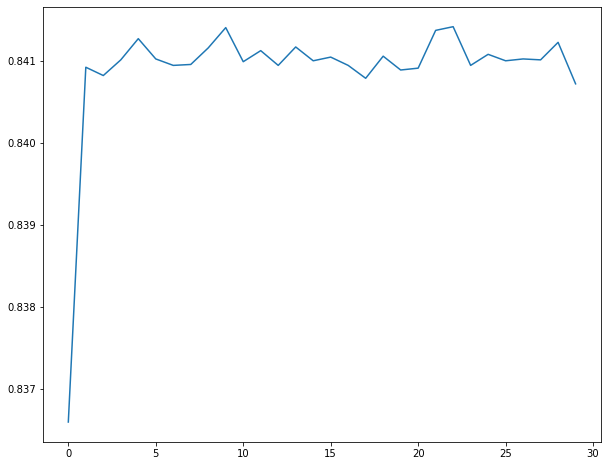

In [92]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
# prepare sequence
X = X_train
y = dummy_y
# create model
model = Sequential()
model.add(Dense(20, input_dim=14, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# train model
NN = model.fit(X, y, epochs=30, batch_size=m, verbose=2)
# plot metrics
#pyplot.plot(NN.history['accuracy'])
#pyplot.show()

In [93]:
print(NN.history.keys())

dict_keys(['loss', 'accuracy'])


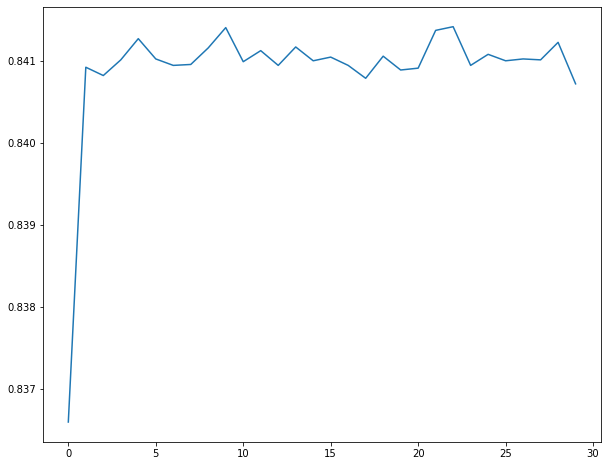

In [94]:
#history = model.fit(X, y, epochs=30, batch_size=m, verbose=2)
# plot metrics
pyplot.plot(NN.history['accuracy'])
#pyplot.plot(history.history['loss'])
pyplot.show()

# Neural Network model shows better accuracy of 84.5 better than any other machine learning model implemented on Test data

In [104]:
test

,Estimated_Insects_Count,Number_Doses_Week_bin,Number_Weeks_Used_bin,Number_Weeks_Quit_bin,Crop_0,Crop_1,Soil_0,Soil_1,Pesticide_1,Pesticide_2,Pesticide_3,Season_1,Season_2,Season_3
0,5.236442,0,0,0,0,1,0,1,1,0,0,0,1,0
1,6.016157,0,0,0,0,1,0,1,1,0,0,0,1,0
2,6.439350,0,0,0,0,1,1,0,1,0,0,0,1,0
3,6.594413,0,0,0,0,1,1,0,1,0,0,0,1,0
4,6.670766,0,0,0,1,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59305,8.112827,0,0,1,0,1,1,0,0,1,0,1,0,0
59306,8.165079,0,0,1,0,1,1,0,0,1,0,0,1,0
59307,8.216628,0,0,1,0,1,1,0,0,1,0,1,0,0
59308,8.216628,0,0,1,0,1,1,0,0,1,0,0,1,0


In [105]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
final_test = sc.fit_transform(test)

# Converting test data to be used in NN model

In [106]:
final_test

array([[-2.65551161, -0.89739322, -0.56921186, ..., -0.65594167,
         1.00507103, -0.50265941],
       [-1.505892  , -0.89739322, -0.56921186, ..., -0.65594167,
         1.00507103, -0.50265941],
       [-0.88193184, -0.89739322, -0.56921186, ..., -0.65594167,
         1.00507103, -0.50265941],
       ...,
       [ 1.73850418, -0.89739322, -0.56921186, ...,  1.5245258 ,
        -0.99495456, -0.50265941],
       [ 1.73850418, -0.89739322, -0.56921186, ..., -0.65594167,
         1.00507103, -0.50265941],
       [ 1.81343436, -0.89739322,  1.75681511, ...,  1.5245258 ,
        -0.99495456, -0.50265941]])

In [169]:
#predicting the Crop Damange by using Neural Network
y_predict_NN=model.predict(final_test)
df=pd.DataFrame(y_predict_NN)
# converting the NP array to Pandas data frame. Identifying the the colum which has maximum probability predicted
df.idxmax(axis=1)

In [180]:
df_solution_NN = pd.DataFrame()
df_solution_NN['ID'] = submissiontest.ID
df_solution_NN['Crop_Damage'] = df.idxmax(axis=1)
df_solution_NN

,ID,Crop_Damage
0,F00000002,1
1,F00000007,1
2,F00000011,1
3,F00000013,1
4,F00000014,1
...,...,...
59305,F00155937,0
59306,F00155940,0
59307,F00155941,0
59308,F00155943,0


0        1
1        1
2        1
3        1
4        1
        ..
59305    0
59306    0
59307    0
59308    0
59309    0
Length: 59310, dtype: int64

# Lets submit the solution

In [181]:
df_solution_NN.to_csv("Neural Network_Implementation_Agriculture_Analytics_Submission.csv", index=False)